<a href="https://colab.research.google.com/github/naren161/Industrial_copper_modeling_ML/blob/main/copper_industry_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
# reading th file

df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")

# Set display options to show all columns
pd.set_option('display.max_columns', None)

<ipython-input-8-a964f0939226>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")


In [9]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
df.shape

(181673, 14)

In [11]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [12]:
# checking datatypes
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [13]:

# Assuming df is your DataFrame
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce')
df['delivery_date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d',errors='coerce')

# Calculate the number of days between item_date and delivery_date
df['days_between'] = (df['delivery_date'] - df['item_date']).dt.days


In [14]:
# drop negative values in days_between column
df.drop(df[df['days_between']<0].index,inplace=True)

In [15]:
# deleting unwanted column for prediction
df.drop(['id','item_date','delivery date','delivery_date','material_ref'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165566 entries, 0 to 181531
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  165566 non-null  object 
 1   customer       165565 non-null  float64
 2   country        165538 non-null  float64
 3   status         165564 non-null  object 
 4   item type      165566 non-null  object 
 5   application    165542 non-null  float64
 6   thickness      165565 non-null  float64
 7   width          165566 non-null  float64
 8   product_ref    165566 non-null  int64  
 9   selling_price  165565 non-null  float64
 10  days_between   165560 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.2+ MB


In [17]:
# replacing as per guidelines
df.rename(columns = {'quantity tons':'quantity_tons','item type':'item_type'},inplace=True)

In [18]:
# preprocessing the columns are required
df['quantity_tons'] = pd.to_numeric(df['quantity_tons'],errors='coerce')
df['country'] = pd.to_numeric(df['country'],errors='coerce')

#Filtering the status values other than "Won and Lost"
df.query("status == 'Won' or status == 'Lost'", inplace =True)



In [19]:
df.shape

(135792, 11)

In [20]:
# checking Nan values
df.isna().sum()

quantity_tons    1
customer         1
country          4
status           0
item_type        0
application      3
thickness        0
width            0
product_ref      0
selling_price    1
days_between     5
dtype: int64

In [21]:
df.dropna(how = 'any',inplace = True)

In [22]:
df.isna().sum()

quantity_tons    0
customer         0
country          0
status           0
item_type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
days_between     0
dtype: int64

In [23]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price,days_between
count,135780.000000,1.357800e+05,135780.000000,135780.000000,135780.000000,135780.000000,1.357800e+05,135780.000000,135780.000000
mean,92.682478,3.023404e+07,46.018928,24.355295,2.690494,1304.821651,4.840361e+08,831.472153,66.213271
std,420.903151,1.085416e+05,24.665364,17.465256,7.445614,266.780291,7.210107e+08,203.431487,39.261639
min,-4.000000,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000,0.000000
25%,10.925203,3.019722e+07,26.000000,10.000000,0.750000,1180.000000,6.283770e+05,678.000000,31.000000
50%,30.029695,3.020531e+07,32.000000,15.000000,1.500000,1250.000000,6.406650e+05,816.000000,63.000000
75%,64.175624,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,956.000000,99.000000
max,70252.363070,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,10913.000000,448.000000


In [24]:
# droping negative values
df.drop(df[df['quantity_tons']<0].index,inplace=True)
df.drop(df[df['selling_price']<0].index,inplace=True)

In [25]:
df.describe()

,quantity_tons,customer,country,application,thickness,width,product_ref,selling_price,days_between
count,135775.000000,1.357750e+05,135775.000000,135775.000000,135775.000000,135775.000000,1.357750e+05,135775.000000,135775.000000
mean,92.684315,3.023405e+07,46.019208,24.355065,2.690519,1304.823250,4.840180e+08,831.517120,66.213905
std,420.910694,1.085431e+05,24.665477,17.465365,7.445740,266.783883,7.210036e+08,203.264847,39.261891
min,0.000010,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,0.000000,0.000000
25%,10.925655,3.019722e+07,26.000000,10.000000,0.750000,1180.000000,6.283770e+05,678.000000,31.000000
50%,30.029704,3.020531e+07,32.000000,15.000000,1.500000,1250.000000,6.406650e+05,816.000000,63.000000
75%,64.174115,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,956.000000,99.000000
max,70252.363070,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,10913.000000,448.000000


In [26]:
#Categorical - country,status,item type,application,material_ref,product_ref
#Regression - quantity tons,thickness,width,selling_price

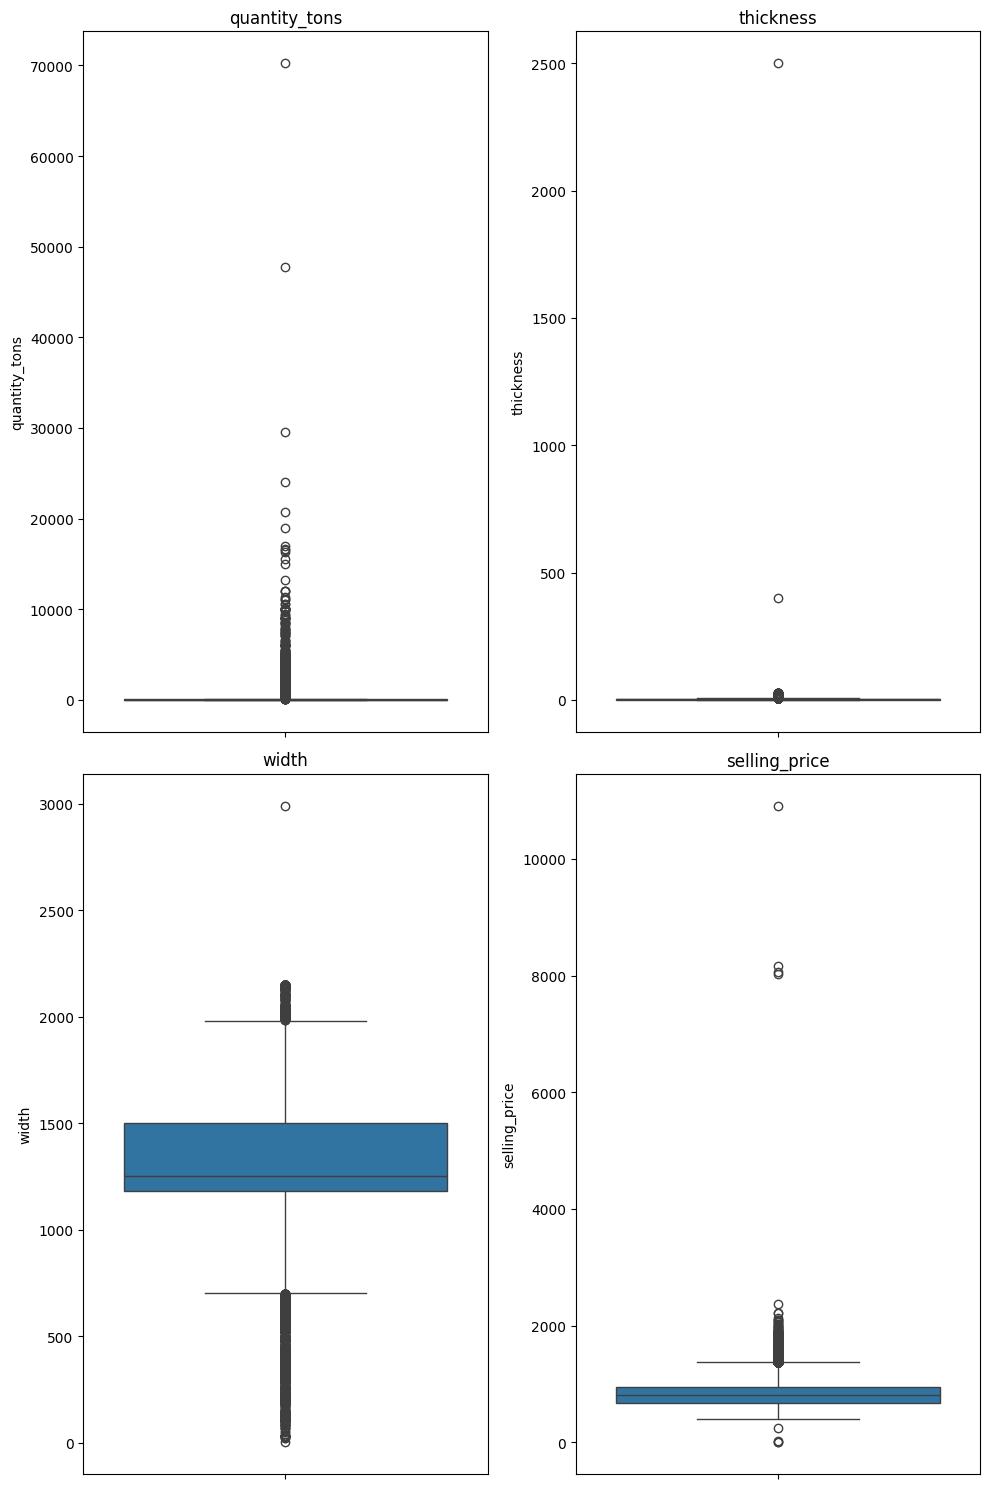

In [27]:
# distribution of continous data before outliers
# import for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,15))

plt.subplot2grid((2,2),(0,0))
sns.boxplot(df['quantity_tons'])
plt.title("quantity_tons")

plt.subplot2grid((2,2),(0,1))
sns.boxplot(df['thickness'])
plt.title("thickness")

plt.subplot2grid((2,2),(1,0))
sns.boxplot(df['width'])
plt.title("width")

plt.subplot2grid((2,2),(1,1))
sns.boxplot(df['selling_price'])
plt.title("selling_price")

plt.tight_layout()
plt.show()

In [28]:
# detecting outliers
df.quantity_tons.describe()


count    135775.000000
mean         92.684315
std         420.910694
min           0.000010
25%          10.925655
50%          30.029704
75%          64.174115
max       70252.363070
Name: quantity_tons, dtype: float64

In [29]:
q3 = df.quantity_tons.quantile(0.75)
q1 = df.quantity_tons.quantile(0.25)
iqr = q3-q1

upper_threshold = q3+(1.5 * iqr)
lower_threshold = q1-(1.5 * iqr)

upper_threshold,lower_threshold


(144.046803675, -68.947033445)

In [30]:
df.quantity_tons = df.quantity_tons.clip(lower_threshold,upper_threshold)

In [31]:
df.thickness.describe()

count    135775.000000
mean          2.690519
std           7.445740
min           0.180000
25%           0.750000
50%           1.500000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [32]:
q3 = df.thickness.quantile(0.75)
q1 = df.thickness.quantile(0.25)
iqr = q3-q1

upper_threshold = q3+(1.5*iqr)
lower_threshold = q1-(1.5*iqr)
upper_threshold,lower_threshold

(6.375, -2.625)

In [33]:
df.thickness = df.thickness.clip(lower_threshold,upper_threshold)

In [34]:
df.width.describe()

count    135775.000000
mean       1304.823250
std         266.783883
min           1.000000
25%        1180.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [35]:
q3 = df.width.quantile(0.75)
q1 = df.width.quantile(0.25)
iqr = q3-q1

upper_threshold = q3+(1.5*iqr)
lower_threshold = q1-(1.5*iqr)
upper_threshold,lower_threshold

(1980.0, 700.0)

In [36]:
df.width = df.width.clip(lower_threshold,upper_threshold)

In [37]:
df.selling_price.describe()

count    135775.000000
mean        831.517120
std         203.264847
min           0.000000
25%         678.000000
50%         816.000000
75%         956.000000
max       10913.000000
Name: selling_price, dtype: float64

In [38]:
q3 = df.selling_price.quantile(0.75)
q1 = df.selling_price.quantile(0.25)
iqr = q3-q1

upper_threshold = q3+(1.5*iqr)
lower_threshold = q1-(1.5*iqr)
upper_threshold,lower_threshold

(1373.0, 261.0)

In [39]:
df.selling_price = df.selling_price.clip(lower_threshold,upper_threshold)

In [40]:
df.selling_price.describe()

count    135775.000000
mean        830.067606
std         194.255618
min         261.000000
25%         678.000000
50%         816.000000
75%         956.000000
max        1373.000000
Name: selling_price, dtype: float64

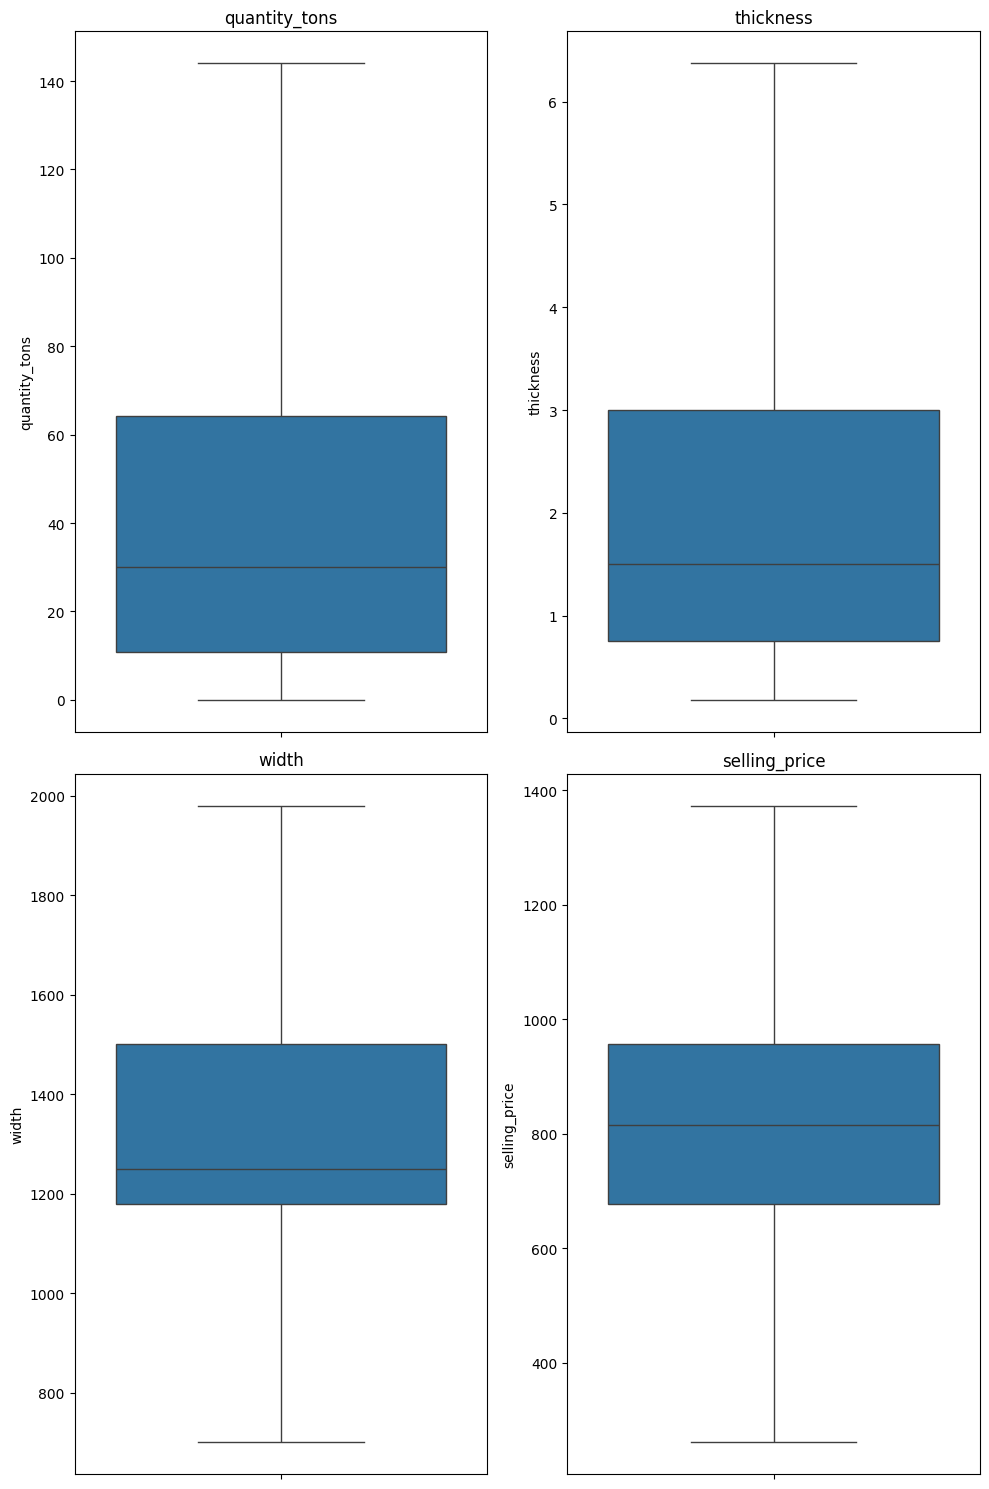

In [41]:
# distribution of continous data after outliers
# import for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,15))

plt.subplot2grid((2,2),(0,0))
sns.boxplot(df['quantity_tons'])
plt.title("quantity_tons")

plt.subplot2grid((2,2),(0,1))
sns.boxplot(df['thickness'])
plt.title("thickness")

plt.subplot2grid((2,2),(1,0))
sns.boxplot(df['width'])
plt.title("width")

plt.subplot2grid((2,2),(1,1))
sns.boxplot(df['selling_price'])
plt.title("selling_price")

plt.tight_layout()
plt.show()

In [42]:
df.head(10)

,quantity_tons,customer,country,status,item_type,application,thickness,width,product_ref,selling_price,days_between
0,54.151139,30156308.0,28.0,Won,W,10.0,2.000,1500.0,1670798778,854.00,91.0
1,144.046804,30202938.0,25.0,Won,W,41.0,0.800,1210.0,1668701718,1047.00,0.0
5,144.046804,30202938.0,25.0,Won,W,41.0,1.500,1265.0,1668701718,983.00,0.0
8,69.071853,30341428.0,38.0,Won,S,10.0,0.600,1275.0,1668701376,1363.00,91.0
9,144.046804,30202938.0,25.0,Won,W,41.0,1.500,1165.0,1668701718,983.00,0.0
12,27.512545,30165529.0,78.0,Won,W,10.0,0.750,1250.0,164141591,1098.00,91.0
13,32.235317,30202362.0,27.0,Won,S,10.0,0.600,1010.0,628377,973.00,91.0
16,75.124394,30153510.0,30.0,Won,W,41.0,0.595,1265.0,611993,1161.86,0.0
17,20.807114,30211222.0,30.0,Won,W,10.0,0.450,900.0,611993,1315.19,91.0
20,71.366978,30153510.0,30.0,Won,W,41.0,0.595,1265.0,611993,1161.31,0.0


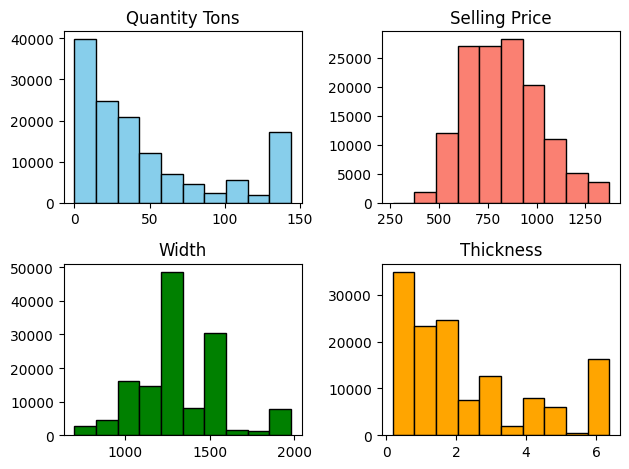

In [43]:
# before skewness
# Set up the subplots grid
plt.subplot(2, 2, 1)  # subplot at position (0,0)
plt.hist(df['quantity_tons'], bins=10, color='skyblue', edgecolor='black')
plt.title("Quantity Tons")

plt.subplot(2, 2, 2)  # subplot at position (0,1)
plt.hist(df['selling_price'], bins=10, color='salmon', edgecolor='black')
plt.title("Selling Price")

plt.subplot(2, 2, 3)  # subplot at position (1,0)
plt.hist(df['width'], bins=10, color='green', edgecolor='black')
plt.title("Width")

plt.subplot(2, 2, 4)  # subplot at position (1,1)
plt.hist(df['thickness'], bins=10, color='orange', edgecolor='black')
plt.title("Thickness")

plt.tight_layout()

# Show the plot
plt.show()


In [44]:
# Define a list of column names
col = ['quantity_tons','selling_price', 'width', 'thickness']

# Iterate through each column name in the list
for i in col:
    # Select the data from the DataFrame corresponding to the current column
    column_data = df[i]

    # Calculate the skewness of the selected data
    skewness = column_data.skew()

    # Check if the skewness is positive or negative and print the result
    if skewness > 0:
        # If skewness is positive, print 'Positive Skew'
        print(skewness, 'Positive Skew')
    else:
        # If skewness is non-positive (zero or negative), print 'Negative Skew'
        print(skewness, 'Negative Skew')


1.0933577543272717 Positive Skew
0.45579850929853816 Positive Skew
0.6580141437257432 Positive Skew
0.9691527703467729 Positive Skew


In [45]:
# if the skew lies between -1 to +1 here no need to transorm here the skew values are above 1
# so we need to use log transform method

df['quantity_tons'] = np.log(df['quantity_tons'])

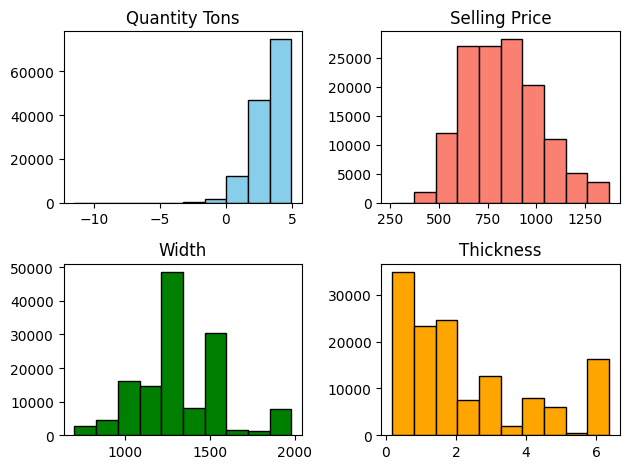

In [46]:
# after skewness
# Set up the subplots grid
plt.subplot(2, 2, 1)  # subplot at position (0,0)
plt.hist(df['quantity_tons'], bins=10, color='skyblue', edgecolor='black')
plt.title("Quantity Tons")

plt.subplot(2, 2, 2)  # subplot at position (0,1)
plt.hist(df['selling_price'], bins=10, color='salmon', edgecolor='black')
plt.title("Selling Price")

plt.subplot(2, 2, 3)  # subplot at position (1,0)
plt.hist(df['width'], bins=10, color='green', edgecolor='black')
plt.title("Width")

plt.subplot(2, 2, 4)  # subplot at position (1,1)
plt.hist(df['thickness'], bins=10, color='orange', edgecolor='black')
plt.title("Thickness")

plt.tight_layout()

# Show the plot
plt.show()


In [47]:
# Define a list of column names
col = ['quantity_tons','selling_price', 'width', 'thickness']

# Iterate through each column name in the list
for i in col:
    # Select the data from the DataFrame corresponding to the current column
    column_data = df[i]

    # Calculate the skewness of the selected data
    skewness = column_data.skew()

    # Check if the skewness is positive or negative and print the result
    if skewness > 0:
        # If skewness is positive, print 'Positive Skew'
        print(skewness, 'Positive Skew')
    else:
        # If skewness is non-positive (zero or negative), print 'Negative Skew'
        print(skewness, 'Negative Skew')


-0.7903166733946817 Negative Skew
0.45579850929853816 Positive Skew
0.6580141437257432 Positive Skew
0.9691527703467729 Positive Skew


In [48]:
# checking the categorical unique values
df['status'].unique()
df['item_type'].unique()

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL', 'SLAWR'], dtype=object)

In [49]:
# encoding
df['status'] = df['status'].map({'Won':1,'Lost':0})   #label encoding


In [50]:
df = pd.get_dummies(df, columns=['item_type'])

In [51]:
df.head(10)

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,days_between,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,3.991779,30156308.0,28.0,1,10.0,2.000,1500.0,1670798778,854.00,91.0,False,False,False,False,False,True,False
1,4.970138,30202938.0,25.0,1,41.0,0.800,1210.0,1668701718,1047.00,0.0,False,False,False,False,False,True,False
5,4.970138,30202938.0,25.0,1,41.0,1.500,1265.0,1668701718,983.00,0.0,False,False,False,False,False,True,False
8,4.235147,30341428.0,38.0,1,10.0,0.600,1275.0,1668701376,1363.00,91.0,False,False,False,True,False,False,False
9,4.970138,30202938.0,25.0,1,41.0,1.500,1165.0,1668701718,983.00,0.0,False,False,False,False,False,True,False
12,3.314642,30165529.0,78.0,1,10.0,0.750,1250.0,164141591,1098.00,91.0,False,False,False,False,False,True,False
13,3.473063,30202362.0,27.0,1,10.0,0.600,1010.0,628377,973.00,91.0,False,False,False,True,False,False,False
16,4.319145,30153510.0,30.0,1,41.0,0.595,1265.0,611993,1161.86,0.0,False,False,False,False,False,True,False
17,3.035295,30211222.0,30.0,1,10.0,0.450,900.0,611993,1315.19,91.0,False,False,False,False,False,True,False
20,4.267835,30153510.0,30.0,1,41.0,0.595,1265.0,611993,1161.31,0.0,False,False,False,False,False,True,False


In [52]:
df['item_type_IPL'] = df['item_type_IPL'].astype(int)
df['item_type_IPL	'] = df['item_type_IPL'].astype(int)
df['item_type_Others'] = df['item_type_Others'].astype(int)
df['item_type_PL'] = df['item_type_PL'].astype(int)
df['item_type_S'] = df['item_type_S'].astype(int)
df['item_type_SLAWR'] = df['item_type_SLAWR'].astype(int)
df['item_type_W'] = df['item_type_W'].astype(int)
df['item_type_WI'] = df['item_type_WI'].astype(int)

In [53]:
df.head()

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,days_between,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,item_type_IPL\t
0,3.991779,30156308.0,28.0,1,10.0,2.0,1500.0,1670798778,854.0,91.0,0,0,0,0,0,1,0,0
1,4.970138,30202938.0,25.0,1,41.0,0.8,1210.0,1668701718,1047.0,0.0,0,0,0,0,0,1,0,0
5,4.970138,30202938.0,25.0,1,41.0,1.5,1265.0,1668701718,983.0,0.0,0,0,0,0,0,1,0,0
8,4.235147,30341428.0,38.0,1,10.0,0.6,1275.0,1668701376,1363.0,91.0,0,0,0,1,0,0,0,0
9,4.970138,30202938.0,25.0,1,41.0,1.5,1165.0,1668701718,983.0,0.0,0,0,0,0,0,1,0,0


In [54]:
# correlation visual

In [55]:
df.corr()

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,days_between,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,item_type_IPL\t
quantity_tons,1.000000,0.085548,-0.100492,-0.147091,0.082292,0.031105,0.040620,0.065489,-0.060198,0.097229,-0.019514,0.044503,0.006665,0.348926,0.003676,-0.356032,0.069151,-0.019514
customer,0.085548,1.000000,0.087608,-0.039742,0.024450,0.081419,0.040588,-0.037336,-0.007655,0.001915,0.004445,0.011581,-0.018848,0.089865,-0.000389,-0.082446,-0.001329,0.004445
country,-0.100492,0.087608,1.000000,0.117216,-0.025712,-0.058007,0.045184,-0.158937,-0.029616,-0.280629,-0.010684,-0.033719,-0.112935,-0.059862,-0.002203,0.104609,-0.015124,-0.010684
status,-0.147091,-0.039742,0.117216,1.000000,0.164928,-0.172462,-0.120903,-0.081154,0.068626,-0.248517,0.008120,0.018382,0.099508,-0.325808,0.001563,0.278120,0.031453,0.008120
application,0.082292,0.024450,-0.025712,0.164928,1.000000,-0.165791,-0.200500,-0.122805,0.172875,-0.154502,-0.005520,0.009382,-0.123651,-0.093699,0.002586,0.133739,0.016317,-0.005520
thickness,0.031105,0.081419,-0.058007,-0.172462,-0.165791,1.000000,0.427553,0.141889,-0.406611,0.078438,0.010395,0.004461,0.031606,0.052925,-0.002306,-0.060351,-0.032574,0.010395
width,0.040620,0.040588,0.045184,-0.120903,-0.200500,0.427553,1.000000,-0.030634,-0.197967,0.031271,0.016686,-0.012670,0.070051,0.053935,-0.000617,-0.071563,-0.051552,0.016686
product_ref,0.065489,-0.037336,-0.158937,-0.081154,-0.122805,0.141889,-0.030634,1.000000,-0.080322,0.178664,0.006291,-0.006327,0.025666,0.080178,-0.001820,-0.084772,-0.023529,0.006291
selling_price,-0.060198,-0.007655,-0.029616,0.068626,0.172875,-0.406611,-0.197967,-0.080322,1.000000,0.321558,-0.003714,0.003096,-0.076397,-0.086089,0.005098,0.115220,-0.032015,-0.003714
days_between,0.097229,0.001915,-0.280629,-0.248517,-0.154502,0.078438,0.031271,0.178664,0.321558,1.000000,-0.016973,-0.000308,-0.079503,0.168203,-0.000637,-0.127737,-0.072459,-0.016973


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


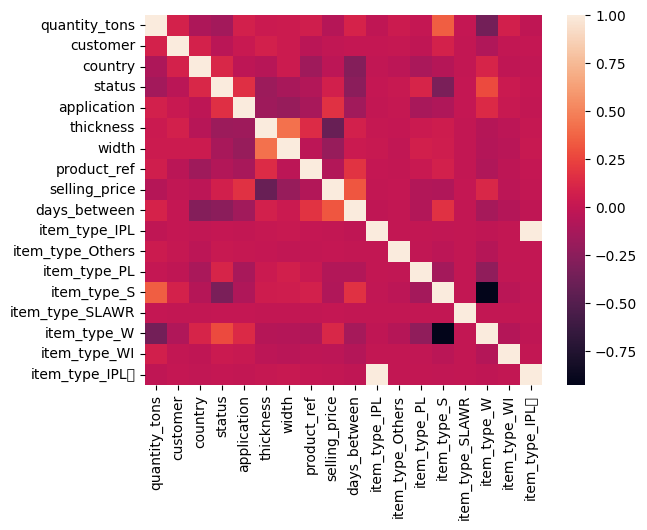

In [56]:
sns.heatmap(data = df.corr())
plt.show()

In [51]:
# saving the data
df.to_csv("copper_final_data.csv")

In [52]:
# training the model-Selling price
# selling price is a continous data so here regression ML model is used
#y-selling_price is a target value

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [54]:
y = df['selling_price']
x = df.drop(['selling_price'],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [56]:
from sklearn.preprocessing import StandardScaler  #import
from sklearn.model_selection import cross_val_score

scaler = StandardScaler() #initialise
scaler.fit(x_train) # fit
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)


In [61]:
# KNN (K Nearest Neighbour) Regression
# choosing the best k Neighbour value


knn_values = np.arange(1,10)
cross_val_knn = []
for k in knn_values:
  knn_regressor = KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(x_train_scaled,y_train)
  print("K value : ",k, "train score : ",knn_regressor.score(x_train_scaled,y_train), "cross_val_score : ",cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean())



K value :  1 train score :  0.9986548365435205 cross_val_score :  0.6634867623827037
K value :  2 train score :  0.918636216361174 cross_val_score :  0.7138353139413158
K value :  3 train score :  0.8769355550015309 cross_val_score :  0.721642563086718
K value :  4 train score :  0.8484103751489274 cross_val_score :  0.7201986187390228
K value :  5 train score :  0.8265567783146088 cross_val_score :  0.7164661178342497
K value :  6 train score :  0.8090123598703093 cross_val_score :  0.7119660053972905
K value :  7 train score :  0.7946752994132537 cross_val_score :  0.7071701769930641
K value :  8 train score :  0.7824850774431137 cross_val_score :  0.7023458146296593
K value :  9 train score :  0.7715763242288894 cross_val_score :  0.6971352605826062


In [62]:
max_mean_score = max(cross_val_knn)
best_k_index = cross_val_knn.index(max_mean_score)
best_k_value = knn_values[best_k_index]

In [63]:
print("Best K value : ",best_k_value)
print("Maximum mean cross-validation score : ",max_mean_score)

Best K value :  3
Maximum mean cross-validation score :  0.721642563086718


In [64]:
# implementing KNN Regression
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(x_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=3)

In [65]:
cross_val_knn_regressor = cross_val_score(knn_regressor,x_train_scaled,y_train,cv=10).mean()

In [66]:
cross_val_knn_regressor

0.721642563086718

In [68]:
#Descision Tree Regression

from sklearn.tree import DecisionTreeRegressor

depth_values = np.arange(1,30)
cross_val_scores = []

# Perform cross-validation for each value of max_depth
for d in depth_values:
    dt_regressor = DecisionTreeRegressor(max_depth=d, random_state=0)

    # Fit the model
    dt_regressor.fit(x_train_scaled, y_train)

    # Calculate cross-validation scores
    cv_scores = cross_val_score(dt_regressor, x_train_scaled, y_train, cv=10)
    mean_cv_score = cv_scores.mean()

    # Print the results
    print("Depth value:", d, "Train score:", dt_regressor.score(x_train_scaled, y_train), "Cross-validation score:", mean_cv_score)

    # Store the mean cross-validation score
    cross_val_scores.append(mean_cv_score)

Depth value: 1 Train score: 0.3166354125458509 Cross-validation score: 0.3165813666881587
Depth value: 2 Train score: 0.44621736286095603 Cross-validation score: 0.44606464651216954
Depth value: 3 Train score: 0.4914811632127172 Cross-validation score: 0.49063406249768216
Depth value: 4 Train score: 0.5247366006613983 Cross-validation score: 0.5238182559513218
Depth value: 5 Train score: 0.563681876947407 Cross-validation score: 0.5631306302026589
Depth value: 6 Train score: 0.6027218260948037 Cross-validation score: 0.6007456219872596
Depth value: 7 Train score: 0.6404502416296001 Cross-validation score: 0.6357501925104925
Depth value: 8 Train score: 0.6806000876504437 Cross-validation score: 0.6729580229757295
Depth value: 9 Train score: 0.7156978542121146 Cross-validation score: 0.703365234935782
Depth value: 10 Train score: 0.7515020943094015 Cross-validation score: 0.732308825745656
Depth value: 11 Train score: 0.786583600558973 Cross-validation score: 0.7588010344210052
Depth val

In [69]:

# Find the max cross-validation score and the corresponding depth value
max_mean_score = max(cross_val_scores)
best_depth_index = cross_val_scores.index(max_mean_score)
best_depth_value = depth_values[best_depth_index]


In [70]:
print("Best max_depth value:", best_depth_value)
print("Best cross-validation mean score:", max_mean_score)

Best max_depth value: 20
Best cross-validation mean score: 0.851667185398688


In [76]:
# implementing descision Tree regression
dt_regressor = DecisionTreeRegressor(max_depth=20,random_state = 0) # initialize
dt_regressor.fit(x_train_scaled,y_train) #fit

DecisionTreeRegressor(max_depth=20, random_state=0)

In [77]:
cross_val_dt_regression = cross_val_score(dt_regressor,x_train_scaled,y_train,cv=15).mean()
cross_val_dt_regression

0.8547869252867593

In [80]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

max_depth = np.array([2,4,6,7,8,10,12,14,16,17,20])
cross_val_rf = []
for i in max_depth:
  rf_regressor = RandomForestRegressor(max_depth = i,random_state=0)
  rf_regressor.fit(x_train_scaled,y_train)
  print("Depth : ",i, "cross_val_score : ", cross_val_score(rf_regressor,x_train_scaled,y_train,cv=10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,x_train_scaled,y_train,cv=10).mean())


Depth :  2 cross_val_score :  0.44641708143434355
Depth :  4 cross_val_score :  0.5287132279472407
Depth :  6 cross_val_score :  0.613872879097699
Depth :  7 cross_val_score :  0.6547455212592462
Depth :  8 cross_val_score :  0.6951330761991559
Depth :  10 cross_val_score :  0.7652010893790986
Depth :  12 cross_val_score :  0.8239353028203537
Depth :  14 cross_val_score :  0.8666009180358485
Depth :  16 cross_val_score :  0.8924557552075745
Depth :  17 cross_val_score :  0.9004185850634864
Depth :  20 cross_val_score :  0.9108571006570052


In [81]:
max_mean_score = max(cross_val_rf)
best_rf_index = cross_val_rf.index(max_mean_score)
best_depth_value = max_depth[best_rf_index]

print("Best depth value:", best_depth_value)
print("Maximum mean cross-validation score:", max_mean_score)

Best depth value: 20
Maximum mean cross-validation score: 0.9108571006570052


In [78]:
# implementing random forest regressor
rf_regressor = RandomForestRegressor(max_depth=20,random_state=0)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [82]:
cross_val_reg_rf = cross_val_score(rf_regressor,x_train_scaled,y_train,cv=10).mean()
cross_val_reg_rf

0.9108571006570052

In [83]:
# Extreme Gradient Boosting regression

cross_val_xgb = []
for lr in [0.01,0.05,0.08,0.1,0.2]:
  xgb_regressor = xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(x_train_scaled,y_train)
  print("Learning : ",lr, "cross_val_score : ",cross_val_score(xgb_regressor,x_train_scaled,y_train,cv=10).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,x_train_scaled,y_train,cv=10).mean())

Learning :  0.01 cross_val_score :  0.5439620598508981
Learning :  0.05 cross_val_score :  0.7331002199951941
Learning :  0.08 cross_val_score :  0.758649096897986
Learning :  0.1 cross_val_score :  0.7729712225527628
Learning :  0.2 cross_val_score :  0.8162121326648963


In [84]:
cross_val_xgb_regressor = np.max(cross_val_xgb)
cross_val_xgb_regressor

0.8162121326648963

In [85]:
print("The best learning rate is 0.2  and cross val score is ",cross_val_xgb_regressor)

The best learning rate is 0.2  and cross val score is  0.8162121326648963


In [86]:
# implementing
xgb_regressor = xgb.XGBRegressor(learning_rate =0.2,n_estimators=100)
xgb_regressor.fit(x_train_scaled,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
cross_val_xgb_regressor = (cross_val_score(xgb_regressor,x_train_scaled,y_train,cv=10).mean())

In [88]:
cross_val_xgb_regressor

0.8162121326648963

In [89]:
# cross validation score for machine learning models

print("Cross Validation score for Decision Tree Regression model : ",cross_val_dt_regression)
print("Cross Validation score for Random Forest Regression model : ",cross_val_reg_rf)
print("Cross Validation score for XGradient Regression model : ",cross_val_xgb_regressor)

Cross Validation score for Decision Tree Regression model :  0.8547869252867593
Cross Validation score for Random Forest Regression model :  0.9108571006570052
Cross Validation score for XGradient Regression model :  0.8162121326648963


In [91]:
# R2 score
from sklearn.metrics import r2_score

y_predict_dt = dt_regressor.predict(x_test_scaled)
y_predict_rf = rf_regressor.predict(x_test_scaled)
y_predict_xgb = xgb_regressor.predict(x_test_scaled)


In [92]:
r2_score_dt = r2_score(y_test,y_predict_dt)
r2_score_rf = r2_score(y_test,y_predict_rf)
r2_score_xgb = r2_score(y_test,y_predict_xgb)

In [93]:
# r2 score
print("R2 score for Decision Tree Regression model : ",r2_score_dt)
print("R2 score for Random Forest Regression model : ",r2_score_rf)
print("R2 score for XGradient Regression model : ",r2_score_xgb)

R2 score for Decision Tree Regression model :  0.8625812361165397
R2 score for Random Forest Regression model :  0.9187243358259243
R2 score for XGradient Regression model :  0.8224428088903672


In [96]:
df.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'days_between',
       'item_type_IPL', 'item_type_Others', 'item_type_PL', 'item_type_S',
       'item_type_SLAWR', 'item_type_W', 'item_type_WI', 'item_type_IPL\t'],
      dtype='object')

In [57]:
# Training for classification model

y = df['status']
x = df.drop(['status'],axis=1)


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [61]:
# RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
max_depth = np.array([2,4,6,7,8,10,12,14,16,17,20])
cross_val = []
for i in max_depth:
  rf_classifier = RandomForestClassifier(max_depth=i,random_state=0)
  rf_classifier.fit(x_train,y_train)
  rf_classifier_mean = cross_val_score(rf_classifier,x_train,y_train,cv=10).mean()
  print("Depth : ",i,"cross_val_score : ",rf_classifier_mean)
  cross_val.append(rf_classifier_mean)

Depth :  2 cross_val_score :  0.7504142883446879
Depth :  4 cross_val_score :  0.7882802430491622
Depth :  6 cross_val_score :  0.815512796906647
Depth :  7 cross_val_score :  0.8223899834284663
Depth :  8 cross_val_score :  0.8348646658074019
Depth :  10 cross_val_score :  0.861333087829129
Depth :  12 cross_val_score :  0.8945498066654392
Depth :  14 cross_val_score :  0.9228595102191125
Depth :  16 cross_val_score :  0.9422574111581661
Depth :  17 cross_val_score :  0.9480758607991161
Depth :  20 cross_val_score :  0.956987663413736


In [62]:
max_mean_score = max(cross_val)
best_rf_index = cross_val.index(max_mean_score)
best_rf_value = max_depth[best_rf_index]

print("Best rf value:", best_rf_value)
print("Maximum mean cross-validation score:", max_mean_score)


Best rf value: 20
Maximum mean cross-validation score: 0.956987663413736


In [64]:
# implementing
rf_classifier = RandomForestClassifier(max_depth=20,random_state=0)
rf_classifier.fit(x_train,y_train)


RandomForestClassifier(max_depth=20, random_state=0)

In [65]:
cross_val_class = cross_val_score(rf_classifier,x_train,y_train,cv=10).mean()
cross_val_class

0.956987663413736

In [66]:
# **Extreme Gradient Boosting classifier**
import xgboost as xgb

cross_val_xgb = []
for lr in [0.01,0.05,0.08,0.1,0.2]:
  xgb_classifier = xgb.XGBClassifier(learning_rate = lr,n_estimators=100)
  xgb_classifier.fit(x_train_scaled,y_train)
  xgb_max_mean = cross_val_score(xgb_classifier,x_train_scaled,y_train,cv=10).mean()
  print("Learning rate : ",lr,"cross_val_score", xgb_max_mean)
  cross_val_xgb.append(xgb_max_mean)


Learning rate :  0.01 cross_val_score 0.8153470815687719
Learning rate :  0.05 cross_val_score 0.861811821027435
Learning rate :  0.08 cross_val_score 0.8752531762106426
Learning rate :  0.1 cross_val_score 0.8825906831154484
Learning rate :  0.2 cross_val_score 0.9091603756214324


In [70]:
max_mean_score = max(cross_val_xgb)
best_xgb_index = cross_val_xgb.index(max_mean_score)
best_xgb_value = [0.01,0.05,0.08,0.1,0.2][best_xgb_index]

print("Best k value:", best_xgb_value)
print("Maximum mean cross-validation score:", max_mean_score)

Best k value: 0.2
Maximum mean cross-validation score: 0.9091603756214324


In [72]:
# implementing
xgb_classifier = xgb.XGBClassifier(learning_rate =0.2,n_estimators=100)
xgb_classifier.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
cross_val_xgb_classifier = cross_val_score(xgb_classifier,x_train,y_train,cv=10).mean()
cross_val_xgb_classifier

0.9099889523108085

In [74]:
#Descision Tree classification

from sklearn.tree import DecisionTreeClassifier

depth_values = np.arange(1,30)
cross_val_scores = []

# Perform cross-validation for each value of max_depth
for d in depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=d, random_state=0)

    # Fit the model
    dt_classifier.fit(x_train_scaled, y_train)

    # Calculate cross-validation scores
    cv_scores = cross_val_score(dt_classifier, x_train_scaled, y_train, cv=10)
    mean_cv_score = cv_scores.mean()

    # Print the results
    print("Depth value:", d, "Train score:", dt_classifier.score(x_train_scaled, y_train), "Cross-validation score:", mean_cv_score)

    # Store the mean cross-validation score
    cross_val_scores.append(mean_cv_score)


Depth value: 1 Train score: 0.7504142883446879 Cross-validation score: 0.7504142883446879
Depth value: 2 Train score: 0.752531762106426 Cross-validation score: 0.752531762106426
Depth value: 3 Train score: 0.7779138280243049 Cross-validation score: 0.7778585895783465
Depth value: 4 Train score: 0.7819922666175658 Cross-validation score: 0.7797919351868899
Depth value: 5 Train score: 0.7993739642791383 Cross-validation score: 0.7976891916774076
Depth value: 6 Train score: 0.8121708709261646 Cross-validation score: 0.8102191125023017
Depth value: 7 Train score: 0.8292027250966673 Cross-validation score: 0.8274258884183391
Depth value: 8 Train score: 0.845479653839072 Cross-validation score: 0.8432793224083962
Depth value: 9 Train score: 0.8609464187074204 Cross-validation score: 0.8592892653286688
Depth value: 10 Train score: 0.8773246179340821 Cross-validation score: 0.8733566562327381
Depth value: 11 Train score: 0.8944117105505431 Cross-validation score: 0.8841005339716442
Depth value

In [78]:

# Find the max cross-validation score and the corresponding depth value
max_mean_score = max(cross_val_scores)
best_depth_index = cross_val_scores.index(max_mean_score)
best_depth_value = depth_values[best_depth_index]

print("Best k value:", best_depth_value)
print("Maximum mean cross-validation score:", max_mean_score)


Best k value: 25
Maximum mean cross-validation score: 0.9442091695820289


In [79]:
# implementing
dt_classifier = DecisionTreeClassifier(max_depth=25, random_state=0)

# Fit the model
dt_classifier.fit(x_train_scaled, y_train)


DecisionTreeClassifier(max_depth=25, random_state=0)

In [81]:
cross_val_dt_classifier = cross_val_score(dt_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_dt_classifier

0.9442091695820289

In [83]:
# cross validation score for machine learning models

print("Cross Validation score for Decision Tree classification model : ",cross_val_dt_classifier)
print("Cross Validation score for Random Forest classifcation model : ",cross_val_class)
print("Cross Validation score for XGradient classification model : ",cross_val_xgb_classifier)

Cross Validation score for Decision Tree classification model :  0.9442091695820289
Cross Validation score for Random Forest classifcation model :  0.956987663413736
Cross Validation score for XGradient classification model :  0.9099889523108085


In [ ]:
# Confusion Matrix, Accuracy, Recall, Precision and F1 score

In [87]:
# metrices

models = []
models.append(('Decesion Tree',DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('XGBoost',xgb.XGBClassifier()))

In [88]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


In [89]:
for name, model in models:
  print(name,model)
  print()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print("confusion_matrix : ",confusion_matrix(y_test,y_pred))
  print('\n')
  print("accuracy : ",accuracy_score(y_test,y_pred))
  print('\n')
  print("precision : ",precision_score(y_test,y_pred))
  print('\n')
  print("recall :",recall_score(y_test,y_pred))
  print('\n')
  print("f1 score : ",f1_score(y_test,y_pred))

Decesion Tree DecisionTreeClassifier()

confusion_matrix :  [[ 6075   617]
 [  771 19692]]


accuracy :  0.9488860246731725


precision :  0.9696193805701906


recall : 0.9623222401407419


f1 score :  0.9659570293338565
Random Forest RandomForestClassifier()

confusion_matrix :  [[ 6194   498]
 [  456 20007]]


accuracy :  0.9648683483704659


precision :  0.9757132406730066


recall : 0.9777158774373259


f1 score :  0.976713532513181
XGBoost XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,